<h1>Instructions</h1>
<p>Compile each cell and then advance to the next one</p>
<p>Follow the instructions when needed</p>

In [1]:
# default libraries
from datetime import datetime

# external libraries (instalation needed)
from netCDF4 import Dataset
import matplotlib.pyplot as plt
import numpy as np

<h1>Reading netCDF file</h1>
set filepath to the relative path of the netCDF file you want to inspect

In [4]:
filepath = "output/MRR/netCDF/attmrrcam.b0.20200110.000002.ave.nc"
dataR = Dataset(filepath, "r+", format="NETCDF4")
dataR.set_auto_mask(False)

<h1>Inspecting netCDF file</h1>

In [5]:
dataR

<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF4 data model, file format HDF5):
    command_line: N/A
    conventions: N/A
    dod_version: N/A
    input_source: N/A
    site_id: N/A
    platform_id: mrr
    facility_id: cam
    data_level: b0
    location_description: Amazon Tall Tower Observatory (ATTO), Amazonia, Brazil
    datastream: attmrrcam.b0
    serial_number: 1 minute
    sampling_interval: 1 minute
    averaging_interval: N/A
    doi: N/A
    dimensions(sizes): profile(31), Ndrop(64), time(1440)
    variables(dimensions): uint32 lat(), uint32 lon(), uint32 alt(), uint32 base_time(), float32 time_offset(time), float32 time(time), float32 mdq(time), float32 height_mrr(time, profile), float32 TF_mrr(time, profile), float32 Fnn_mrr(time, profile, Ndrop), float32 Dnn_mrr(time, profile, Ndrop), float32 Ndnn_mrr(time, profile, Ndrop), float32 PIA_mrr(time, profile), float32 Zdb_mrr(time, profile), float32 Zdb_att_mrr(time, profile), float32 rain_rate_mrr(time, profile), floa

<h4>Set var_of_interest to the variable you want to inspect</h4>

In [8]:
var_of_interest="rain_rate_mrr"
dataR[var_of_interest]

<class 'netCDF4._netCDF4.Variable'>
float32 rain_rate_mrr(time, profile)
    long_name: Rain Intensity
    units: dBZ
    missing_value: -999.0
unlimited dimensions: 
current shape = (1440, 31)
filling on, default _FillValue of 9.969209968386869e+36 used

<h1>Printing netCDF file variable</h1>

<h4>Getting the absolute datetimes for each line</h4>

In [5]:
time_absolute = dataR['time_offset'][:]+dataR['base_time'][0]
time_absolute = [datetime.utcfromtimestamp(int(time_absolute[i])) for i in range(len(time_absolute))]

<h4>Set x axis to time</h4>

In [6]:
x=time_absolute

<h4>Check the heights of the data records</h4>

In [7]:
dataR["height_mrr"][0,:]

array([ 300.,  600.,  900., 1200., 1500., 1800., 2100., 2400., 2700.,
       3000., 3300., 3600., 3900., 4200., 4500., 4800., 5100., 5400.,
       5700., 6000., 6300., 6600., 6900., 7200., 7500., 7800., 8100.,
       8400., 8700., 9000., 9300.], dtype=float32)

<h4>Set height_of_interest to the height you want to inspect in the plot</h4>

In [8]:
height_of_interest = 8700
ind = np.where(dataR["height_mrr"][0,:]==height_of_interest)[0][0]

<h4>Set y axis to the variable of interest at the desired height</h4>

In [9]:
y=dataR[var_of_interest][:,ind]

<h4>Set fig_height and fig_width to the desired dimensions for the plot</h4>
<i>You can also adjust fontsize if needed<i>

Text(0, 0.5, 'rain_rate_mrr at 8700')

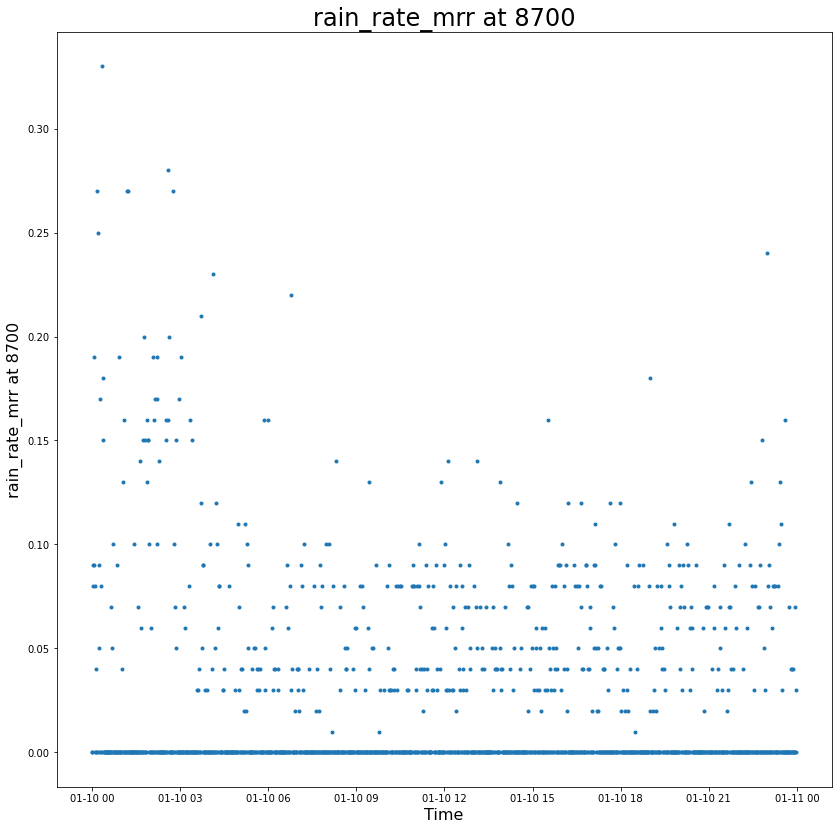

In [10]:
fig_height = 1000
fig_width = 1000

fig = plt.figure(figsize=(fig_width/72, fig_height/72))
plt.plot(x, y, '.')
plt.title(var_of_interest+" at "+str(height_of_interest),fontsize=24)
plt.xlabel('Time',fontsize=16)
plt.ylabel(var_of_interest+" at "+str(height_of_interest),fontsize=16)